In [1]:
#import dependencies

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
#Store file path in a variable and read in csv

file = "MasterYouTube.csv"

master_df = pd.read_csv(file)

#Print head
master_df.head()

Unnamed: 0                                        Video Title     Video ID  \
0           0        Sam Smith - Pray (Official Video) ft. Logic  8h--kFui1JA   
1           1         WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  j4KvrAUjn6c   
2           2  YoungBoy Never Broke Again Goes Sneaker Shoppi...  t4pRQ0jn23Q   
3           3  周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's...  MAjY8mCTXWk   
4           4                                 Cobra Kai Season 2  WIV3xNz8NoM   

   Number of Days Trending            Time Published  Total Views  
0                       29  2018-05-09T17:00:00.000Z     17424422  
1                       29  2018-05-13T18:03:56.000Z      9081270  
2                       28  2018-05-14T14:00:03.000Z      4406761  
3                       28  2018-05-14T15:59:47.000Z     17259071  
4                       28  2018-05-10T17:02:55.000Z      1011030

In [3]:
#Reformat date so I can pull out just the date published and put it in a new column

master_df[['Date Published', 'Publish Time']] = master_df["Time Published"].str.split("T",expand=True)

master_df.head()


Unnamed: 0                                        Video Title     Video ID  \
0           0        Sam Smith - Pray (Official Video) ft. Logic  8h--kFui1JA   
1           1         WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  j4KvrAUjn6c   
2           2  YoungBoy Never Broke Again Goes Sneaker Shoppi...  t4pRQ0jn23Q   
3           3  周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's...  MAjY8mCTXWk   
4           4                                 Cobra Kai Season 2  WIV3xNz8NoM   

   Number of Days Trending            Time Published  Total Views  \
0                       29  2018-05-09T17:00:00.000Z     17424422   
1                       29  2018-05-13T18:03:56.000Z      9081270   
2                       28  2018-05-14T14:00:03.000Z      4406761   
3                       28  2018-05-14T15:59:47.000Z     17259071   
4                       28  2018-05-10T17:02:55.000Z      1011030   

  Date Published   Publish Time  
0     2018-05-09  17:00:00.000Z  
1     2018-05-13  18:03:56.000Z  
2     2018-05-14  14:00:03.000Z  
3     2018-05-14  15:59:47.000Z  
4     2018-05-10  17:02:55.000Z

In [4]:
#Clean it up

date_df = master_df[["Video Title", "Video ID", "Date Published", "Number of Days Trending", "Total Views"]]

date_df.head()

Video Title     Video ID  \
0        Sam Smith - Pray (Official Video) ft. Logic  8h--kFui1JA   
1         WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  j4KvrAUjn6c   
2  YoungBoy Never Broke Again Goes Sneaker Shoppi...  t4pRQ0jn23Q   
3  周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's...  MAjY8mCTXWk   
4                                 Cobra Kai Season 2  WIV3xNz8NoM   

  Date Published  Number of Days Trending  Total Views  
0     2018-05-09                       29     17424422  
1     2018-05-13                       29      9081270  
2     2018-05-14                       28      4406761  
3     2018-05-14                       28     17259071  
4     2018-05-10                       28      1011030

In [5]:
#Organize by date published
date_df = date_df.sort_values(["Date Published", "Total Views"], ascending=False)

date_df.head()

Video Title     Video ID  \
6189                          Nintendo @ E3 2018: Day 2  8O-ZUXGcuWU   
5718  Courtney Hadwin: 13-Year-Old Golden Buzzer Win...  gPHVLxm8U-0   
6076                      Dumbo Official Teaser Trailer  -QPdRfqTnt4   
5730                          Nintendo @ E3 2018: Day 1  FchkqXEg0qs   
6295         Fortnite Celebrity Pro-Am | #FortniteProAm  qPEIPu0V8GQ   

     Date Published  Number of Days Trending  Total Views  
6189     2018-06-14                        1      1549110  
5718     2018-06-13                        1      5829270  
6076     2018-06-13                        1      4427381  
5730     2018-06-13                        1      3238183  
6295     2018-06-13                        1      2183462

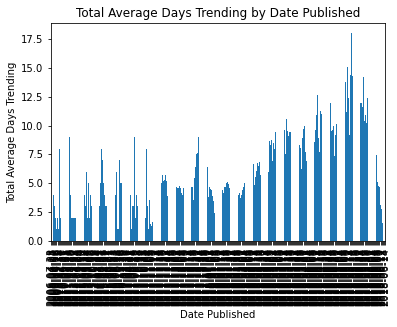

In [6]:
#Find average days trending vs. date published and put into a bar graph



date_df.groupby('Date Published')['Number of Days Trending'].mean().plot(kind='bar')

plt.title("Total Average Days Trending by Date Published")
plt.xlabel("Date Published")
plt.ylabel("Total Average Days Trending")

plt.savefig("TotalDaysTrendingMeanperDatePublishedBar")

plt.show()

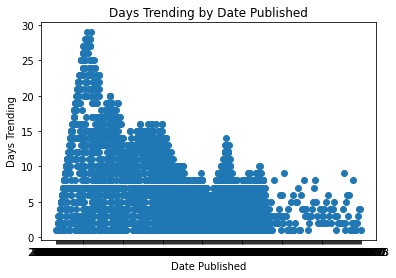

In [7]:
#That doesn't make a whole lot of sense, so I'm trying a scatterplot next

#Scatterplot
plt.scatter(date_df["Date Published"], date_df["Number of Days Trending"])
plt.title("Days Trending by Date Published")
plt.xlabel("Date Published")
plt.ylabel("Days Trending")

plt.savefig("TotalDaysTrendingperDatePublishedScatter")

plt.show()

In [8]:
#I need to separate them into months to make it look better
#Reformat the master_df again to just take out the month

master_df[['Year Published', 'Month Published', 'Day Published']] = master_df["Time Published"].str.split("-",expand=True)

master_df.head()

Unnamed: 0                                        Video Title     Video ID  \
0           0        Sam Smith - Pray (Official Video) ft. Logic  8h--kFui1JA   
1           1         WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  j4KvrAUjn6c   
2           2  YoungBoy Never Broke Again Goes Sneaker Shoppi...  t4pRQ0jn23Q   
3           3  周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's...  MAjY8mCTXWk   
4           4                                 Cobra Kai Season 2  WIV3xNz8NoM   

   Number of Days Trending            Time Published  Total Views  \
0                       29  2018-05-09T17:00:00.000Z     17424422   
1                       29  2018-05-13T18:03:56.000Z      9081270   
2                       28  2018-05-14T14:00:03.000Z      4406761   
3                       28  2018-05-14T15:59:47.000Z     17259071   
4                       28  2018-05-10T17:02:55.000Z      1011030   

  Date Published   Publish Time Year Published Month Published  \
0     2018-05-09  17:00:00.000Z           2018              05   
1     2018-05-13  18:03:56.000Z           2018              05   
2     2018-05-14  14:00:03.000Z           2018              05   
3     2018-05-14  15:59:47.000Z           2018              05   
4     2018-05-10  17:02:55.000Z           2018              05   

      Day Published  
0  09T17:00:00.000Z  
1  13T18:03:56.000Z  
2  14T14:00:03.000Z  
3  14T15:59:47.000Z  
4  10T17:02:55.000Z

In [9]:
#Clean it up
better_df = master_df[["Video Title", "Video ID", "Month Published", "Number of Days Trending", "Total Views"]]

better_df.head()

Video Title     Video ID  \
0        Sam Smith - Pray (Official Video) ft. Logic  8h--kFui1JA   
1         WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  j4KvrAUjn6c   
2  YoungBoy Never Broke Again Goes Sneaker Shoppi...  t4pRQ0jn23Q   
3  周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's...  MAjY8mCTXWk   
4                                 Cobra Kai Season 2  WIV3xNz8NoM   

  Month Published  Number of Days Trending  Total Views  
0              05                       29     17424422  
1              05                       29      9081270  
2              05                       28      4406761  
3              05                       28     17259071  
4              05                       28      1011030

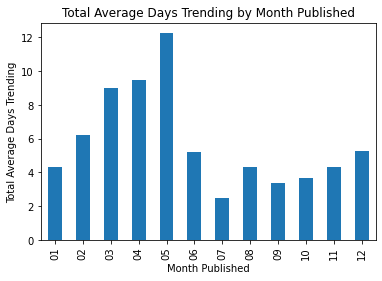

In [10]:
#Let's Try again with month vs. days trending
#Find average days trending vs. date published and put into a bar graph



better_df.groupby('Month Published')['Number of Days Trending'].mean().plot(kind='bar')

plt.title("Total Average Days Trending by Month Published")
plt.xlabel("Month Published")
plt.ylabel("Total Average Days Trending")

plt.savefig("TotalDaysTrendingMeanperMonthPublishedBar")

plt.show()

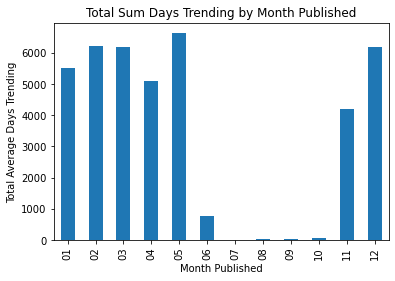

In [11]:
#Do the same with Sum


better_df.groupby('Month Published')['Number of Days Trending'].sum().plot(kind='bar')

plt.title("Total Sum Days Trending by Month Published")
plt.xlabel("Month Published")
plt.ylabel("Total Average Days Trending")

plt.savefig("TotalDaysTrendingSumperMonthPublishedBar")

plt.show()

In [12]:
#Scatterplot of Days trending/month

#First turn month into a number from a string

better_df['Month Published'] = pd.to_numeric(better_df['Month Published'])

C:\Users\mjbgo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


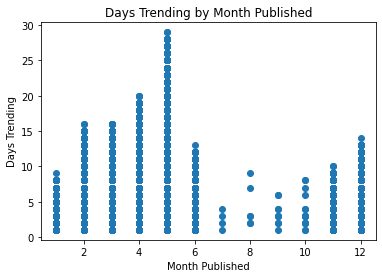

In [13]:



#Scatterplot
plt.scatter(better_df["Month Published"], better_df["Number of Days Trending"])
plt.title("Days Trending by Month Published")
plt.xlabel("Month Published")
plt.ylabel("Days Trending")

plt.savefig("TotalDaysTrendingperMonthPublishedScatter")

plt.show()

In [14]:
#Correlation
month = better_df["Month Published"]
days = better_df["Number of Days Trending"]

correlation = st.pearsonr(month, days)

print(f"The correlation between the two factors is {round(correlation[0],2)}")

The correlation between the two factors is -0.12


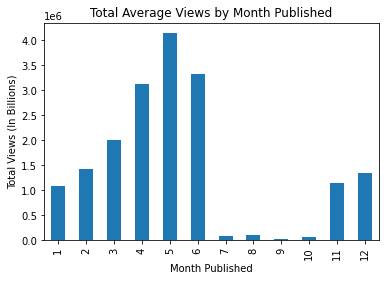

In [15]:
#Do the same for Month published verses views
#Average

better_df.groupby('Month Published')['Total Views'].mean().plot(kind='bar')

plt.title("Total Average Views by Month Published")
plt.xlabel("Month Published")
plt.ylabel("Total Views (In Billions)")

plt.savefig("TotalViewsMeanperMonthPublishedBar")

plt.show()

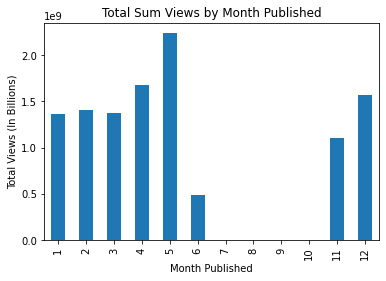

In [16]:
#Find total average views of all videos by date

better_df.groupby('Month Published')['Total Views'].sum().plot(kind='bar')

plt.title("Total Sum Views by Month Published")
plt.xlabel("Month Published")
plt.ylabel("Total Views (In Billions)")

plt.savefig("TotalViewsSumperMonthPublishedBar")

plt.show()

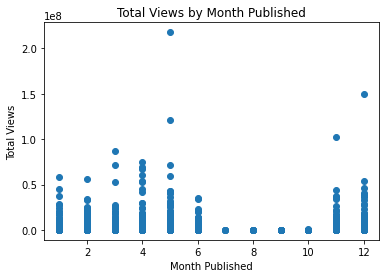

In [17]:
#Scatterplot
plt.scatter(better_df["Month Published"], better_df["Total Views"])
plt.title("Total Views by Month Published")
plt.xlabel("Month Published")
plt.ylabel("Total Views")

plt.savefig("TotalViewsperMonthPublishedScatter")

plt.show()

In [18]:
#Correlation
month = better_df["Month Published"]
views = better_df["Total Views"]

correlation = st.pearsonr(month, views)

print(f"The correlation between the two factors is {round(correlation[0],2)}")

The correlation between the two factors is -0.02


In [19]:
#Separate out the day of the year
master_df[['Day', 'Time']] = master_df["Day Published"].str.split("T",expand=True)

master_df.head()

Unnamed: 0                                        Video Title     Video ID  \
0           0        Sam Smith - Pray (Official Video) ft. Logic  8h--kFui1JA   
1           1         WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  j4KvrAUjn6c   
2           2  YoungBoy Never Broke Again Goes Sneaker Shoppi...  t4pRQ0jn23Q   
3           3  周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's...  MAjY8mCTXWk   
4           4                                 Cobra Kai Season 2  WIV3xNz8NoM   

   Number of Days Trending            Time Published  Total Views  \
0                       29  2018-05-09T17:00:00.000Z     17424422   
1                       29  2018-05-13T18:03:56.000Z      9081270   
2                       28  2018-05-14T14:00:03.000Z      4406761   
3                       28  2018-05-14T15:59:47.000Z     17259071   
4                       28  2018-05-10T17:02:55.000Z      1011030   

  Date Published   Publish Time Year Published Month Published  \
0     2018-05-09  17:00:00.000Z           2018              05   
1     2018-05-13  18:03:56.000Z           2018              05   
2     2018-05-14  14:00:03.000Z           2018              05   
3     2018-05-14  15:59:47.000Z           2018              05   
4     2018-05-10  17:02:55.000Z           2018              05   

      Day Published Day           Time  
0  09T17:00:00.000Z  09  17:00:00.000Z  
1  13T18:03:56.000Z  13  18:03:56.000Z  
2  14T14:00:03.000Z  14  14:00:03.000Z  
3  14T15:59:47.000Z  14  15:59:47.000Z  
4  10T17:02:55.000Z  10  17:02:55.000Z

In [32]:
#Only keep what I need
best_df = master_df[["Video Title", "Video ID", "Number of Days Trending", "Day", "Total Views"]]

best_df.head()

Video Title     Video ID  \
0        Sam Smith - Pray (Official Video) ft. Logic  8h--kFui1JA   
1         WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  j4KvrAUjn6c   
2  YoungBoy Never Broke Again Goes Sneaker Shoppi...  t4pRQ0jn23Q   
3  周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's...  MAjY8mCTXWk   
4                                 Cobra Kai Season 2  WIV3xNz8NoM   

   Number of Days Trending Day  Total Views  
0                       29  09     17424422  
1                       29  13      9081270  
2                       28  14      4406761  
3                       28  14     17259071  
4                       28  10      1011030

In [33]:
#Convert the day to an int
best_df['Day'] = pd.to_numeric(best_df['Day'])

C:\Users\mjbgo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
#Organize by day
best_df = best_df.sort_values(["Day", "Total Views"], ascending=False)

best_df.head()

Video Title     Video ID  \
423                Gorillaz - Humility (Official Video)  E5yFcdPAGv0   
395   Clean Bandit - Solo feat. Demi Lovato [Officia...  8JnfIa84TnU   
589                              THE BICYCLE OF SPRINGS  N39uwTykTQk   
3173  WATCH: The super blue blood moon makes first a...  kUZlz6VbMCg   
691                          Trying $1 Makeup From Wish  LfeEu4_vtfQ   

      Number of Days Trending  Day  Total Views  
423                        14   31     25016614  
395                        14   31     21250349  
589                        13   31      6169981  
3173                        6   31      5625319  
691                        13   31      5558317

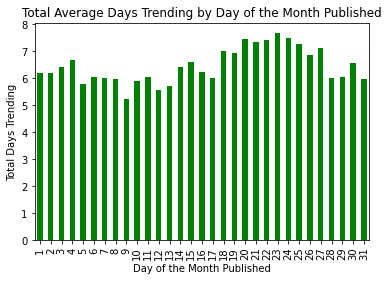

In [47]:
#Create a bar graph that shows day by number of AVERAGE days trending 
best_df.groupby('Day')['Number of Days Trending'].mean().plot(kind='bar', color="green")

plt.title("Total Average Days Trending by Day of the Month Published")
plt.xlabel("Day of the Month Published")
plt.ylabel("Total Days Trending")

plt.savefig("TotalDaysTrendingMeanperDayofMonthPublishedBar")

plt.show()


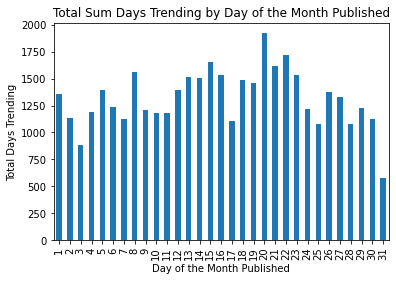

In [37]:
#Create a bar graph that shows day by number of SUM days trending
best_df.groupby('Day')['Number of Days Trending'].sum().plot(kind='bar')

plt.title("Total Sum Days Trending by Day of the Month Published")
plt.xlabel("Day of the Month Published")
plt.ylabel("Total Days Trending")

plt.savefig("TotalDaysTrendingSumperDayofMonthPublishedBar")

plt.show()


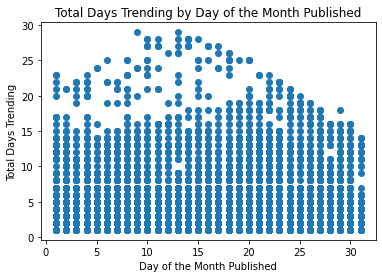

In [39]:
#Scatterplot
plt.scatter(best_df["Day"], best_df["Number of Days Trending"])
plt.title("Total Days Trending by Day of the Month Published")
plt.xlabel("Day of the Month Published")
plt.ylabel("Total Days Trending")

plt.savefig("TotalDaysTredningperDayofMonthPublishedScatter")

plt.show()

In [40]:
#Correlation
month = best_df["Day"]
views = best_df["Number of Days Trending"]

correlation = st.pearsonr(month, views)

print(f"The correlation between the two factors is {round(correlation[0],2)}")

The correlation between the two factors is 0.07


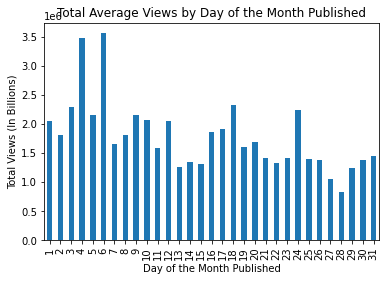

In [48]:
#Create a bar graph that shows day by number of AVERAGE views
best_df.groupby('Day')['Total Views'].mean().plot(kind='bar')

plt.title("Total Average Views by Day of the Month Published")
plt.xlabel("Day of the Month Published")
plt.ylabel("Total Views (In Billions)")

plt.savefig("TotalViewsMeanperDayofMonthPublishedBar")

plt.show()

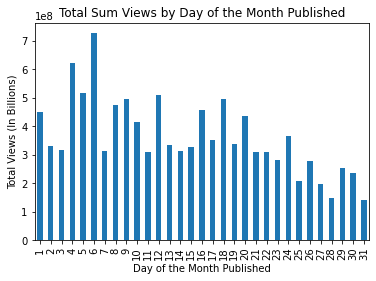

In [42]:
#Create a bar graph that shows day by number of SUM views
best_df.groupby('Day')['Total Views'].sum().plot(kind='bar')

plt.title("Total Sum Views by Day of the Month Published")
plt.xlabel("Day of the Month Published")
plt.ylabel("Total Views (In Billions)")

plt.savefig("TotalViewsSumperDayofMonthPublishedBar")

plt.show()

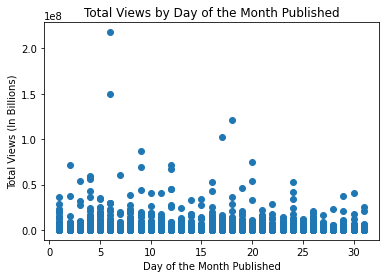

In [43]:
#Scatterplot
plt.scatter(best_df["Day"], best_df["Total Views"])
plt.title("Total Views by Day of the Month Published")
plt.xlabel("Day of the Month Published")
plt.ylabel("Total Views (In Billions)")

plt.savefig("TotalViewsperDayofMonthPublishedScatter")

plt.show()

In [44]:
#Correlation
month = best_df["Day"]
views = best_df["Total Views"]

correlation = st.pearsonr(month, views)

print(f"The correlation between the two factors is {round(correlation[0],2)}")

The correlation between the two factors is -0.06


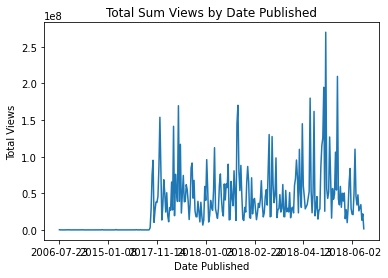

In [45]:
#Create line graph that shows date (x) by views(y) 

master_df.groupby('Date Published')['Total Views'].sum().plot(kind='line')

plt.title("Total Sum Views by Date Published")
plt.xlabel("Date Published")
plt.ylabel("Total Views")

plt.savefig("TotalViewsSumperDatePublishedLine")

plt.show()